In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
data = pd.read_csv('khachhang.csv')

In [5]:
data = data.dropna() # Remove missing values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

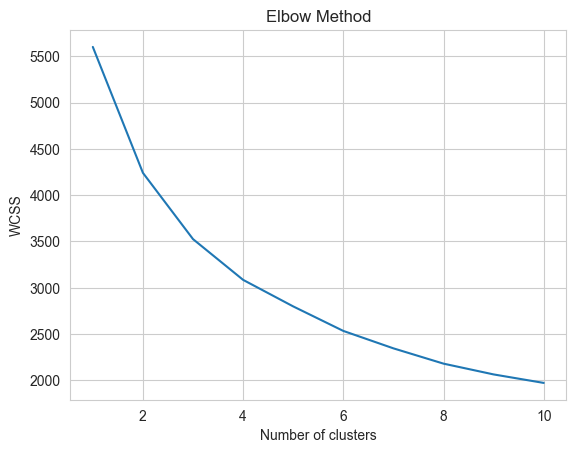

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [8]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
print(data.groupby('Cluster').mean())

         Customer Id        Age       Edu  Years Employed      Income  \
Cluster                                                                 
0         420.408537  31.597561  1.884146        3.859756   31.256098   
1         442.550898  32.239521  1.640719        5.943114   30.928144   
2         441.218750  43.125000  2.343750       17.187500  133.062500   
3         414.382353  41.600000  1.611765       15.905882   71.805882   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Cluster                                                     
0         1.573884    2.811689   0.975610        14.056707  
1         0.667395    1.554440   0.000000         7.590120  
2         7.995750   12.884469   0.593750        19.612500  
3         2.062382    4.400788   0.023529        10.084706  
